| <font color='red'>Belangrijk !!</font> |
|:---|
|Lees voor het maken de inleverinstructies door in de toetsbeschrijving (MS Teams, kanaal algemeen, Files, Moduledocumentatie).  Het niet opvolgen van deze instructies kan leiden tot een onvoldoende |

# Assignment 1
In deze opdracht mag je zelf laten zien wat je hebt geleerd qua clustering. Dit zijn de regels:
- Beantwoord per hoofdstuk de vragen
- Zorg ervoor dat je de gevraagde informatie/data in de voorgedefinieerde variabelen zet. 
- Bij hoofdstuk 2 staan er meer variabelen gedefinieerd dan je nodig hebt. Deze laat je op None staan om aan te geven dat je weet dat je deze niet nodig hebt om jouw oplossing te maken. Dit is onze manier om te testen of je de Methode echt goed snapt en de juiste keuzes weet te maken.  
- Het staat je natuurlijk vrij om andere variabelen te definieren, maar dit zijn de variabelen die we in het codegrade script bekijken. 
- Je kunt zoveel cellen met code en/of commentaar aanmaken als je wilt
- Zorg dat je een notebook inlevert, welke  __alleen__ de code bevat die bijdraagt aan jouw oplossing: je levert tenslotte ook niet jouw kladpapier in bij een schriftelijke toets

# Data beschrijving

Deze opdracht maak je voor een klant van de HS Leiden: Een Bank, die samenwerkt met het BDaM team om hen te helpen inzicht te krijgen over zijn klantprofielen. 

De data in deze assignment is geanonimiseerd, voordat het door het data team werd ingeleverd. Dit is om de gevoelige gegevens van de klanten te beschermen. De data bevat de volgende kolommen:

| __kolomnaam__ | __beschrijving__ | __datatype__ |
|:---|:---|:---|
| klantnummer        | Client nummer. Unieke identificatiecode voor de klant die de rekening heeft | int64   | 
| klant_staat        | Variabele die geeft de klantactiviteit - als het account is gesloten, dan is de staat van de klant     "bestaande" anders is de staat "opgeslagen" | String  | 
| leeftijd           | Leeftijd van de klant in jaren  | int64 | 
| afhankelijk_aantal | Aantal personen ten laste van de klant | int64 | 
| periode_met_bank   | Periode van relatie met bank | int64  | 
| aantal_producten   | Totaal aantal producten in bezit van de klant | int64 | 
| aantal_inactiviteit  | Aantal maanden inactief in de afgelopen 12 maanden | int64  | 
| aantal_contacten     | Aantal contacten in de afgelopen 12 maanden  | int64 | 
| kredietlimiet  | Kredietlimiet op de Creditcard van de klant | float64 | 
| doorlopend_saldo | Totaal doorlopend saldo op de creditcard | int64 |
| transactie_bedrag | Totaal transactiebedrag in de afgelopen 12 maanden | int64 |
| transactie_count | Aantal transacties in de afgelopen 12 maanden | int64 |
| bezettingsgraad  | Gemiddelde kaartgebruiksratio | float64 |

Volg de opdrachten hieronder om de onderzoeksvraag van deze bank op de juiste manier te beantwoorden.


# Import statements

In [1]:
# Import statements van modules die je gebruikt
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 1. Data inladen en voorbereiden

Lees de datafile "Bankwisselaars.csv" in en bereid de data voor zoals je in het werkcollege hebt geleerd. 
Zorg dat aan het einde van deze opdracht de volgende variabelen de waardes bevatten zoals beschreven. Aan het einde van dit hoofdstuk heb je 3 variabelen met de volgende data:

| __Variabele__ | __beschrijving__ | __datatype__
|:---|:--:|:---|
| pad_naar_file | De string die gebruikt wordt in jouw code om de file in te lezen | str |
| df_orig | de originele dataset | Pandas Dataframe |
| df | de bewerkte dataset die gebruikt wordt voor Machine Learning | Pandas Dataframe |


De string die gebruikt wordt in jouw code om de file in te lezen:

In [2]:
pad_naar_file = "Bankwisselaars.csv"

De variabele ```df_orig``` moet de originele ingelezen data van de file ```pad_naar_file``` bevatten. Deze variabele is dus van het type Pandas Dataframe. Zorg dat dit dataframe NIET veranderd tijdens het maken van je je notebook. 

In [3]:
df_orig = pd.read_csv(pad_naar_file)
#schrijf hier je code om de pad_naar_file in te lezen

Als je df hebt ingelezen maak je met onderstaande code een kopie naar de variabele df. Nadat je ```df_orig``` in ```df``` hebt gekopieerd, ga je ```df``` bewerken en de data voorbereiden op machine learning, zoals je geleerd hebt tijdens het werkcollege.
We verwachten dat je de technieken die je hebt geleerd toepast om meer informatie te krijgen over de type data die je hebt. 
We verwachten ook dat ```df``` alle data transformaties uit de voorbereidingsstappen heeft ondergaan, behalve:
 - df is nog __niet__ gestandaardiseerd.
 - df is nog __niet__ opgesplitst in onafhankelijke en afhankelijke variabelen
 - df is nog __niet__ opgesplitst in test en trainingsdata

In [4]:
df = df_orig.copy()

In [5]:
df.describe()
set_klant_staat = {'bestaande':0, 'opgeslagen':1}
df['klant_staat'] = df['klant_staat'].map(set_klant_staat)

In [6]:
df = df.drop(['klantnummer'], axis=1)

<AxesSubplot:>

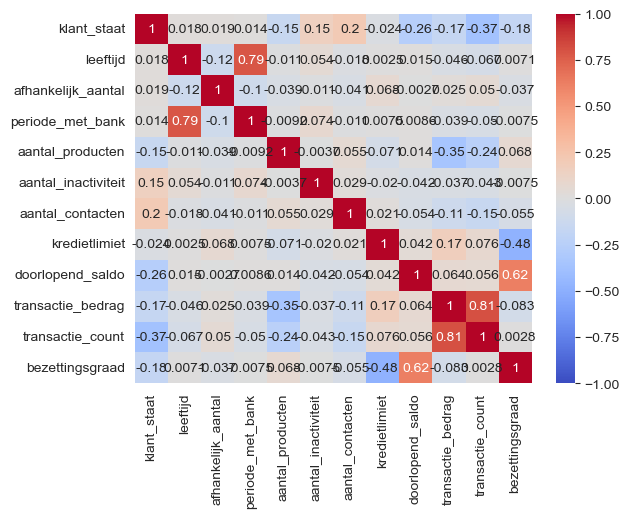

In [7]:
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

klant_staat            0
afhankelijk_aantal     0
periode_met_bank       0
aantal_producten       0
aantal_inactiviteit    0
aantal_contacten       0
kredietlimiet          0
doorlopend_saldo       0
transactie_bedrag      0
bezettingsgraad        0
dtype: int64

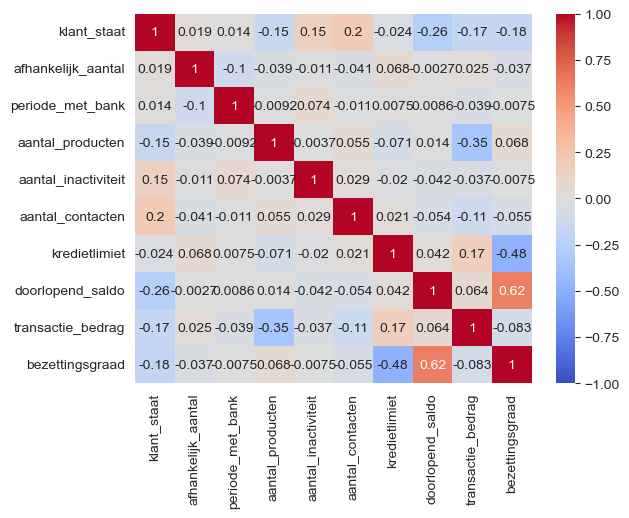

In [8]:
df = df.drop(['leeftijd'], axis=1)
df = df.drop(['transactie_count'], axis=1)
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
df.isnull().sum()

# 2. Welke vergelijkbare klanten profielen kun je in de data vinden?

De bank wil weten welke klant profielen bestaan in de data. Bijvoorbeeld klanten met dezelfde staat lijken meer op elkaar.
Weten welke klant profielen de bank heeft te maken, kan straks helpen om vergelijkbare producten aan klanten van één genereerde groep te bieden.

Jouw opdracht is dus door gebruik te maken van Clustering technieken om verschillende groepen te maken op basis van de eigenschappen uit de dataset. Aan het einde van jouw opdracht kun je dan aan de bank vertellen welke groepen klanten meer op elkaar lijken.


Onderstaande variabelen kun je gebruiken om bovenstaande vraag te beantwoorden. 

De variabelen die je kunt vullen met zinvolle data voor dit probleem zijn:

| __Variabele__ | __beschrijving__ | __datatype__
|:---|:--:|:---|
| scaler_1 | de StandardScaler scaler object | sklearn StandardScaler |
| X_1 | de onafhankelijke variabelen van de gehele dataset | Pandas Dataframe |
| y_1 | de afhankelijke variabelen van de gehele dataset | Pandas Series |
| X_train_1 | de onafhankelijke variabelen van de trainingsset | Pandas Dataframe |
| y_train_1 | de afhankelijke variabelen van de trainingsset | Pandas Series |
| X_test_1 | de onafhankelijke variabelen van de testset | Pandas Dataframe |
| y_test_1 | de afhankelijke variabelen van de testset | Pandas Series |
| model_1  | Jouw gekozen machine learning model | SKLearn model |
| fit_1 | Het model dat uit de fit komt | SKLearn model |
| uitkomst_1 | het resultaat van je machine learning algoritme | Numpy Array |
| score_1 | de score die je vertelt hoe goed jouw model op de data past | float |

## 2.1 Bouw en valideer jouw machine learning model
Zorg ervoor dat de data op de juiste manier wordt voorbereid en vul de variabelen met de data zoals je geleerd hebt.  

Denk je dat je de variabele niet nodig hebt? Laat deze dan op None staan. Zo kunnen we zien of je echt begrijpt wat je aan het doen bent. 

In [9]:
y_1 = None
y_train_1 = None
y_test_1 = None
x_train_1 = None
x_test_1 = None

#het gaat om unsupervised learning, we hebben geen target variabele dus het splitten van de data in train en test is mogelijk, maar niet verplicht

Maak hieronder meerdere cellen aan om jouw machine learning code te schrijven en de oplossing voor het vraagstuk te geven

In [10]:
scaler_1 = StandardScaler()
X_1 = df
scaler_1.fit(X_1)
col_names = list(X_1.columns)
X_1 = pd.DataFrame(scaler_1.transform(X_1), columns=col_names)

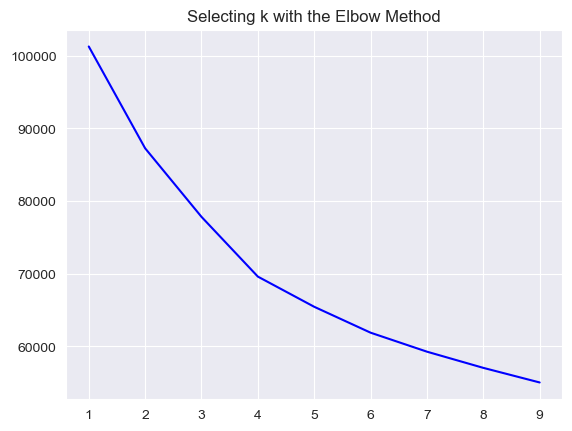

In [11]:
def elbow_method(dataframe, max_K):
    meanDispersions = []
    for i in max_K:
        kmeans_object = KMeans(n_clusters=i)
        kmeans_object.fit(dataframe)
        inertia = kmeans_object.inertia_

        meanDispersions.append(inertia)
    return meanDispersions
K = range(1, 10)
dispersions = elbow_method(X_1, K)

p = sns.lineplot(x=K, y=dispersions, color='blue', markers=True, dashes=False)
p.set_title("Selecting k with the Elbow Method");

In [12]:
model_1 = KMeans(n_clusters=4, random_state=42)
fit_1 = model_1.fit(X_1)
n_clusters = len(np.unique(model_1.labels_))
print("Number of estimated clusters : %d" % n_clusters)
uitkomst_1 = fit_1.predict(X_1)

Number of estimated clusters : 4


In [13]:
score_1 = silhouette_score(X_1, uitkomst_1)
print("Silhouette Coefficient: %0.3f" % score_1)

Silhouette Coefficient: 0.163


## 2.2 evaluatie uitkomst

Als je jouw machine learning algoritme klaar hebt en helemaal correct hebt uitgevoerd, laat het onderstaande stukje code een plot zien van de verdeling per klant staat over de groepen. Het enige wat je hoeft in te vullen is of je X_1, X_train_1, of X_test_1 hebt gebruikt voor de definitieve berekening van uitkomst_1.

In [14]:
#vul in (X_1, X_train_1, of X_test_1),kies de dataset, die je hebt gebruikt om uitkomst_1 uit te rekenen
data_out = X_1

In [15]:
#haal de originele ongeschaalde waardes terug
data_out = pd.DataFrame(scaler_1.inverse_transform(data_out),columns=data_out.columns)
data_out['groep'] = uitkomst_1
data_out.head(5)

,klant_staat,afhankelijk_aantal,periode_met_bank,aantal_producten,aantal_inactiviteit,aantal_contacten,kredietlimiet,doorlopend_saldo,transactie_bedrag,bezettingsgraad,groep
0,0.0,3.0,39.0,5.0,1.0,3.0,12691.0,777.0,1144.0,0.061,1
1,0.0,5.0,44.0,6.0,1.0,2.0,8256.0,864.0,1291.0,0.105,1
2,0.0,3.0,36.0,4.0,1.0,0.0,3418.0,0.0,1887.0,0.000,1
3,0.0,4.0,34.0,3.0,4.0,1.0,3313.0,2517.0,1171.0,0.760,2
4,0.0,3.0,21.0,5.0,1.0,0.0,4716.0,0.0,816.0,0.000,1


C:\Users\Wbouh\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


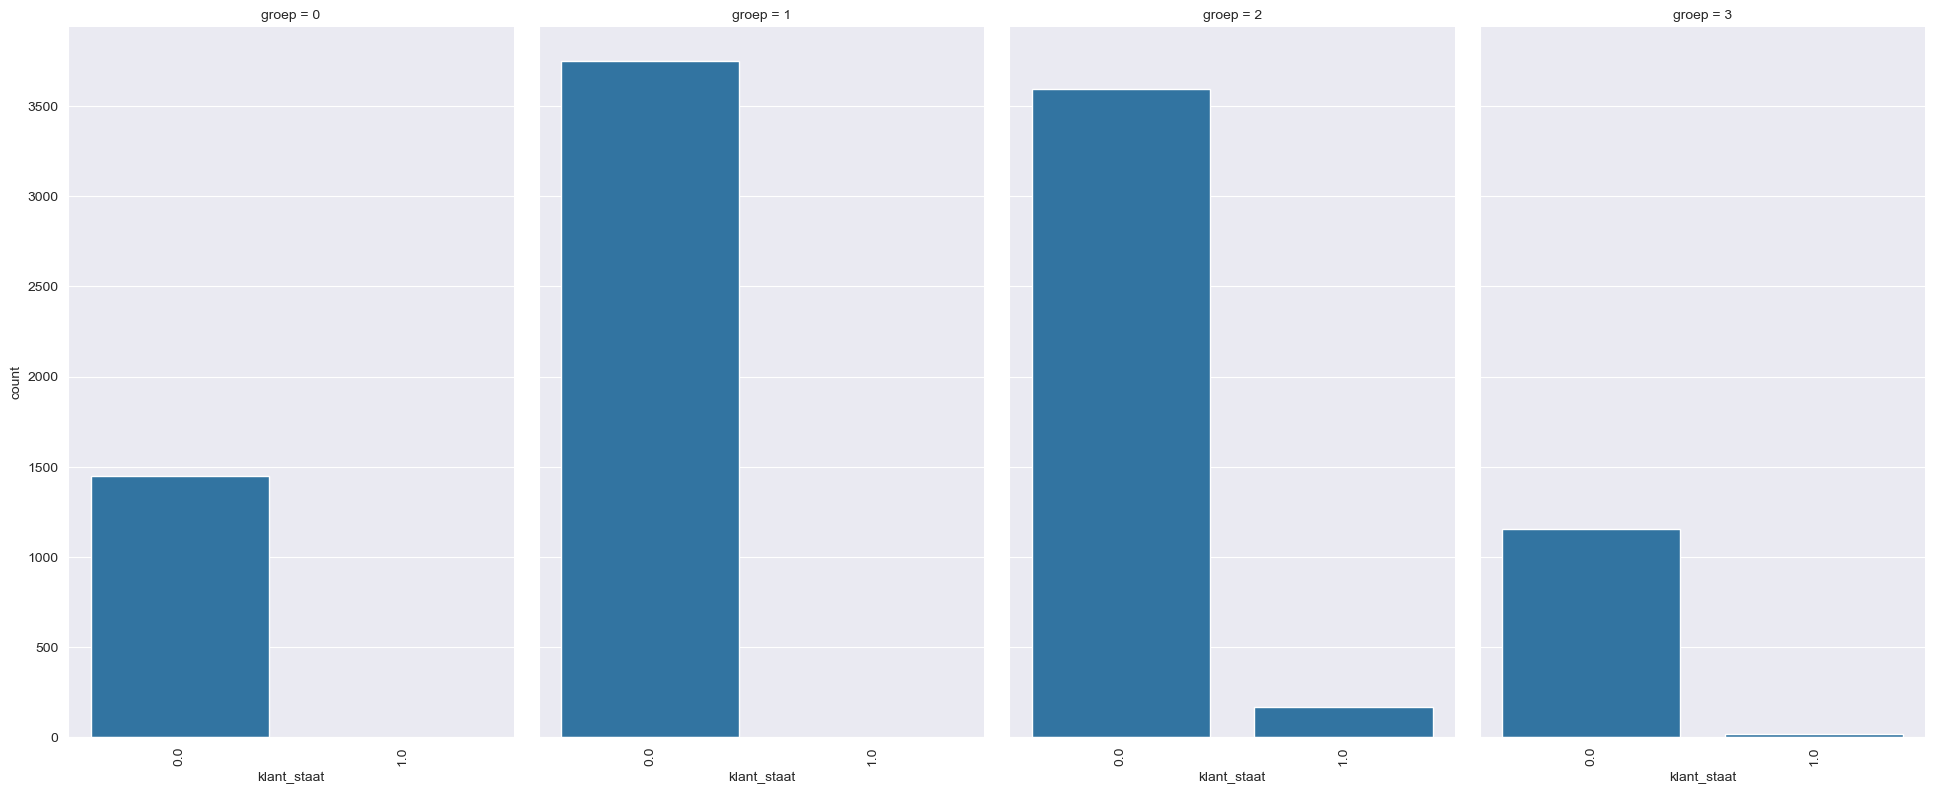

In [16]:
#run de code en negeer de waarschuwing
ngroepen = len(np.unique(uitkomst_1))

grid = sns.FacetGrid(data=data_out, col="groep", col_wrap=ngroepen)
grid.map(sns.countplot, 'klant_staat')
grid.set(xticks=range(0,len(data_out['klant_staat'].unique())))
grid.set_xticklabels(rotation=90)
grid.fig.set_figheight(10)
grid.fig.set_figwidth(20)
grid.add_legend()

Run de bovenstaande code om een plot van het aantal klanten per klantprofiel te maken.

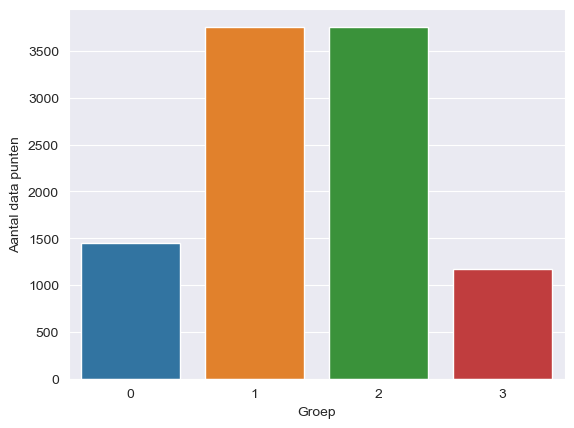

In [17]:
counts = Counter(uitkomst_1)

sns.barplot(x=list(counts.keys()), y=list(counts.values()))

# Voeg labels toe aan de plot
plt.xlabel('Groep')
plt.ylabel('Aantal data punten')
plt.show()

### Dit is het einde van assignment 1

<B>Veel succes!</B>